In [ ]:

#--------------------------------------------------------------------------------------#
# PROTOTIPO                                                                            #
#--------------------------------------------------------------------------------------#


In [ ]:
# Instalar Hugging Face Transformers y Diffusers para generación de texto e imágenes
!pip install transformers diffusers accelerate torch torchvision
# Instalar TextBlob para detección de emociones
!pip install textblob
# Descargar datos de entrenamiento para TextBlob (necesario para análisis de texto)
!python -m textblob.download_corpora
# Traductor
!pip install transformers googletrans==4.0.0-rc1 diffusers accelerate torch

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/5

In [ ]:
from transformers import pipeline
from googletrans import Translator

# Cargar el modelo de clasificación de emociones
clasificador_emociones = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True)

# Inicializar el traductor
traductor = Translator()

def detectar_emocion(texto):
    """
    Detecta emociones en texto en español traduciendo al inglés y usando el modelo Hugging Face.
    """
    # Traducir el texto al inglés
    texto_traducido = traductor.translate(texto, src='es', dest='en').text

    # Detectar emoción en inglés
    resultados = clasificador_emociones(texto_traducido)
    emocion_dominante = max(resultados[0], key=lambda x: x['score'])

    # Traducir emoción de vuelta al español
    emociones_traducidas = {
        "joy": "alegría",
        "sadness": "tristeza",
        "anger": "enojo",
        "fear": "miedo",
        "love": "amor",
        "surprise": "sorpresa"
    }
    return emociones_traducidas.get(emocion_dominante['label'], "desconocida")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cuda:0
/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [ ]:
from diffusers import StableDiffusionPipeline

# Cargar el modelo Stable Diffusion
modelo_sd = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5").to("cuda")

def generar_imagen(emocion, modelo):
    """
    Genera una imagen basada en la emoción detectada.
    """
    descripciones = {
        "alegría": "a bright and colorful painting of a sunny meadow with flowers",
        "tristeza": "a dark and moody oil painting of a rainy cityscape",
        "enojo": "an abstract painting with bold red and black strokes",
        "miedo": "a surreal painting of a shadowy forest with eerie lighting",
        "amor": "a romantic scene of a couple under a glowing sunset",
        "sorpresa": "a vibrant and dynamic painting with explosive colors and shapes"
    }

    descripcion = descripciones.get(emocion, "a beautiful abstract art piece")
    print(f"Generando una imagen para la emoción: {emocion} -> {descripcion}")

    # Generar imagen
    imagen = modelo(descripcion).images[0]
    return imagen


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Bot: ¿Cómo te sientes hoy?
Usuario: me siento enojado
Bot: Detecté que te sientes enojo. Generando una imagen...
Generando una imagen para la emoción: enojo -> an abstract painting with bold red and black strokes


  0%|          | 0/50 [00:00<?, ?it/s]

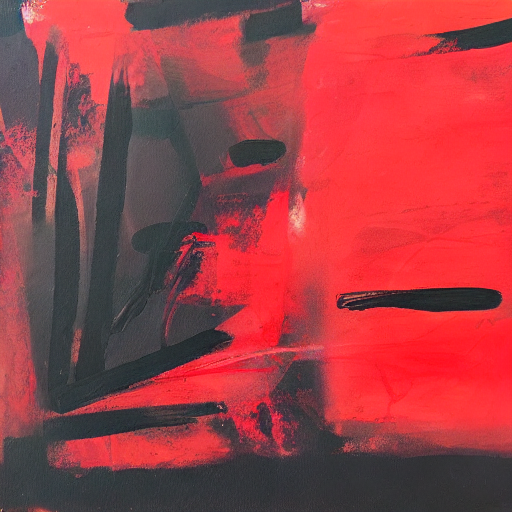

Imagen guardada en: /content/enojo_20250109-221029.png


Button(description='Descargar Imagen', style=ButtonStyle())

In [ ]:
from IPython.display import display
import os
import ipywidgets as widgets
from PIL import Image
import time

def guardar_imagen(imagen, emocion_detectada):
    """
    Guarda la imagen generada en el entorno de Colab y crea un enlace de descarga.
    """
    # Crear un nombre único basado en el timestamp
    timestamp = time.strftime("%Y%m%d-%H%M%S")  # Genera la fecha y hora actual en formato único
    nombre_imagen = f"{emocion_detectada}_{timestamp}.png"  # Nombre único
    ruta_guardado_colab = f"/content/{nombre_imagen}"

    # Guardar la imagen en el sistema de archivos de Colab
    imagen.save(ruta_guardado_colab)
    print(f"Imagen guardada en: {ruta_guardado_colab}")

    return ruta_guardado_colab, nombre_imagen

def crear_boton_descarga(ruta_imagen):
    """
    Crea un botón de descarga en el entorno de Colab.
    """
    descarga_btn = widgets.Button(description="Descargar Imagen")

    # Función que se ejecuta al presionar el botón
    def on_button_click(b):
        print("Iniciando descarga...")
        from google.colab import files
        files.download(ruta_imagen)  # Esto abrirá el cuadro de descarga

    descarga_btn.on_click(on_button_click)
    display(descarga_btn)

def chatbot():
    """
    Interfaz simple para interactuar con el chatbot.
    """
    print("Bot: ¿Cómo te sientes hoy?")
    sentimiento_usuario = input("Usuario: ")

    # Detectar emoción usando traducción y el modelo
    emocion_detectada = detectar_emocion(sentimiento_usuario)
    print(f"Bot: Detecté que te sientes {emocion_detectada}. Generando una imagen...")

    # Generar imagen basada en la emoción detectada
    imagen = generar_imagen(emocion_detectada, modelo_sd)

    # Mostrar imagen
    display(imagen)

    # Guardar imagen y obtener la ruta
    ruta_imagen, nombre_imagen = guardar_imagen(imagen, emocion_detectada)

    # Crear botón de descarga
    crear_boton_descarga(ruta_imagen)

# Ejecutar el chatbot
chatbot()
